In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

1 LDA on Layoffs

In [4]:
'''
Load the dataset from the CSV and save it to 'data_text'
'''
import pandas as pd
data = pd.read_excel('Layoffs 2023 tweets.xlsx');
# We only need the Headlines text column from the data
data_text = data[:300000][['Tweet']];
data_text['index'] = data_text.index

documents = data_text
documents.dropna(inplace=True)

In [5]:
documents[:5]

,Tweet,index
0,Layoffs creating bullish PA $GOOGL https://t.c...,0
1,"The market crash of 2008, where I lost my pens...",1
2,I'm just scared of layoffs. People can't imagi...,2
3,statutory warning: DON'T OPEN LINKEDIN FOR A M...,3
4,Tech industry layoffs feel like a grim omen,4


# Step 2: Data Preprocessing

In [11]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

In [12]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [13]:
'''
Write a function to perform the pre processing steps on the entire dataset
'''
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
  
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            # TODO: Apply lemmatize_stemming() on the token, then add to the results list
            result.append(lemmatize_stemming(token))
            
    return result



In [14]:
print(WordNetLemmatizer().lemmatize('went', pos = 'v')) # past tense to present tense

go


In [15]:
stemmer = SnowballStemmer("english")
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]

pd.DataFrame(data={'original word':original_words, 'stemmed':singles })

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [16]:
def lemmatize_stemming(text):  
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [17]:
document_num = 4310
doc_sample = documents[documents['index'] == document_num].values[0][0]
doc_sample

'Uber not planning layoffs: CEO Dara Khosrowshahi #amazon #khosrowshahi #Meta #microsoft #UberLayoff #wallstreetjournal https://t.co/UTpXz3Gqx3\nhttps://t.co/XDbBzFODG9'

In [18]:
print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original document: 
['Uber', 'not', 'planning', 'layoffs:', 'CEO', 'Dara', 'Khosrowshahi', '#amazon', '#khosrowshahi', '#Meta', '#microsoft', '#UberLayoff', '#wallstreetjournal', 'https://t.co/UTpXz3Gqx3\nhttps://t.co/XDbBzFODG9']


Tokenized and lemmatized document: 
['uber', 'plan', 'layoff', 'dara', 'khosrowshahi', 'amazon', 'khosrowshahi', 'meta', 'microsoft', 'uberlayoff', 'https', 'utpxz', 'https', 'xdbbzfodg']


In [19]:
doc_sample = 'the doctor came to the village to visit some patients yesterday.'
print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original document: 
['the', 'doctor', 'came', 'to', 'the', 'village', 'to', 'visit', 'some', 'patients', 'yesterday.']


Tokenized and lemmatized document: 
['doctor', 'come', 'villag', 'visit', 'patient', 'yesterday']


In [20]:
processed_docs = documents['Tweet'].map(lambda x: preprocess(x))

In [21]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [22]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 bullish
1 creat
2 googl
3 https
4 layoff
5 pditlrfecx
6 compar
7 crash
8 domino
9 effect
10 follow


In [23]:
from collections import Counter
count = Counter()
for doc in processed_docs:
    for word in doc:
        count[word]+=1
print(count)

Counter({'layoff': 34807, 'https': 16637, 'microsoft': 5884, 'tech': 5035, 'compani': 4176, 'employe': 3387, 'job': 2969, 'amazon': 2800, 'peopl': 2730, 'announc': 2056, 'year': 1889, 'like': 1878, 'discuss': 1661, 'work': 1653, 'time': 1542, 'industri': 1513, 'news': 1512, 'come': 1491, 'go': 1461, 'cut': 1460, 'lay': 1426, 'jobcut': 1402, 'recess': 1389, 'worker': 1375, 'game': 1329, 'mass': 1324, 'happen': 1261, 'thelayoff': 1256, 'googl': 1250, 'hire': 1249, 'affect': 1245, 'say': 1224, 'know': 1083, 'report': 1080, 'think': 1064, 'busi': 1037, 'actual': 1033, 'massiv': 1032, 'today': 1012, 'market': 1009, 'plan': 971, 'round': 968, 'start': 956, 'look': 934, 'workforc': 913, 'need': 894, 'potenti': 891, 'week': 848, 'impact': 831, 'twitter': 827, 'good': 823, 'rif': 804, 'month': 777, 'economi': 775, 'visitor': 762, 'continu': 756, 'halo': 747, 'recent': 729, 'begin': 714, 'inflat': 710, 'thing': 674, 'staff': 666, 'right': 664, 'crypto': 660, 'see': 658, 'latest': 653, 'lose': 65

In [24]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)

In [25]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [26]:
bow_corpus[document_num]

[(28, 1), (182, 1), (385, 1), (1697, 1)]

In [27]:
bow_doc_4310 = bow_corpus[document_num]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], dictionary[bow_doc_4310[i][0]], bow_doc_4310[i][1]))

Word 28 ("amazon") appears 1 time.
Word 182 ("plan") appears 1 time.
Word 385 ("meta") appears 1 time.
Word 1697 ("uber") appears 1 time.


In [28]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)

In [29]:
corpus_tfidf = tfidf[bow_corpus]

In [30]:
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.7259424667519162), (1, 0.5704294899875525), (2, 0.38421053072330524)]


In [31]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 10, id2word = dictionary, passes = 50)

In [32]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.020*"develop" + 0.020*"halo" + 0.016*"career" + 0.014*"job" + 0.014*"fight" + 0.013*"manag" + 0.012*"mobil" + 0.012*"jone" + 0.012*"game" + 0.011*"verizon"


Topic: 1 
Words: 0.102*"amazon" + 0.046*"employe" + 0.038*"round" + 0.029*"begin" + 0.028*"meta" + 0.023*"report" + 0.021*"twitter" + 0.021*"worker" + 0.021*"news" + 0.021*"cut"


Topic: 2 
Words: 0.068*"employe" + 0.048*"job" + 0.035*"recess" + 0.033*"lay" + 0.032*"workforc" + 0.028*"startup" + 0.019*"india" + 0.017*"engin" + 0.015*"global" + 0.015*"thelayoff"


Topic: 3 
Words: 0.025*"hire" + 0.025*"continu" + 0.021*"market" + 0.017*"industri" + 0.016*"goldman" + 0.015*"say" + 0.012*"crypto" + 0.012*"year" + 0.012*"sach" + 0.012*"cut"


Topic: 4 
Words: 0.094*"discuss" + 0.074*"jobcut" + 0.057*"thelayoff" + 0.055*"actual" + 0.050*"potenti" + 0.045*"rif" + 0.044*"visitor" + 0.018*"bank" + 0.016*"crypto" + 0.015*"season"


Topic: 5 
Words: 0.033*"peopl" + 0.025*"like" + 0.016*"happen" + 0.015*"game" + 0.014*"yea

In [33]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics = 10, id2word = dictionary, passes = 50)

In [34]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} \nWord: {}".format(idx, topic))
    print("\n")

Topic: 0 
Word: 0.032*"goldman" + 0.025*"sach" + 0.015*"xbox" + 0.014*"bank" + 0.014*"halo" + 0.011*"game" + 0.011*"bethesda" + 0.010*"insid" + 0.010*"davo" + 0.010*"bnym"


Topic: 1 
Word: 0.009*"year" + 0.009*"happen" + 0.007*"need" + 0.007*"appl" + 0.007*"profit" + 0.006*"peopl" + 0.006*"like" + 0.006*"billion" + 0.006*"money" + 0.006*"mean"


Topic: 2 
Word: 0.036*"amazon" + 0.031*"employe" + 0.020*"begin" + 0.020*"cut" + 0.020*"round" + 0.019*"announc" + 0.018*"sharechat" + 0.017*"workforc" + 0.017*"job" + 0.017*"report"


Topic: 3 
Word: 0.079*"discuss" + 0.041*"jobcut" + 0.040*"potenti" + 0.040*"thelayoff" + 0.039*"actual" + 0.039*"visitor" + 0.038*"rif" + 0.016*"snow" + 0.016*"immigr" + 0.014*"highlight"


Topic: 4 
Word: 0.011*"health" + 0.010*"dragon" + 0.010*"kena" + 0.010*"msft" + 0.010*"intel" + 0.008*"qcom" + 0.008*"injuri" + 0.007*"wire" + 0.007*"difficult" + 0.007*"damn"


Topic: 5 
Word: 0.010*"peopl" + 0.010*"like" + 0.009*"work" + 0.009*"time" + 0.008*"know" + 0.007*

3. K-Means

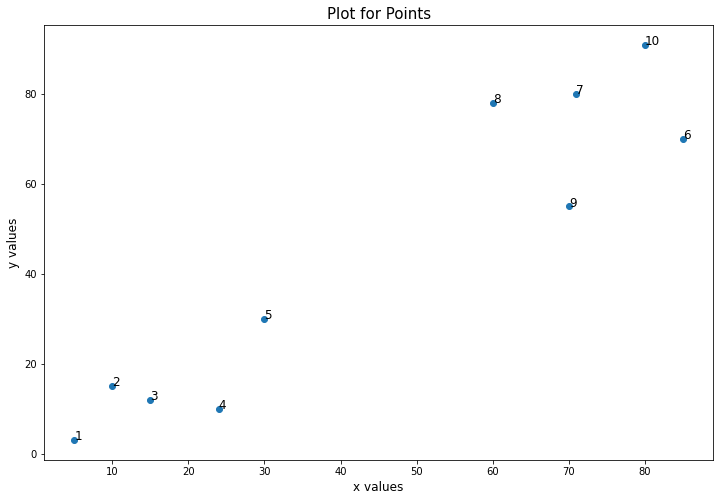

In [ ]:
x = np.array([5, 10, 15, 24,30,85,71,60,70,80])
y = np.array([3, 15, 12, 10,30,70,80,78,55,91])
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x, y,'o')
plt.xlabel("x values", size=12)
plt.ylabel("y values", size=12)
plt.title("Plot for Points", size=15)
for index in range(len(x)):
  ax.text(x[index], y[index],index+1, size=12)
plt.show()

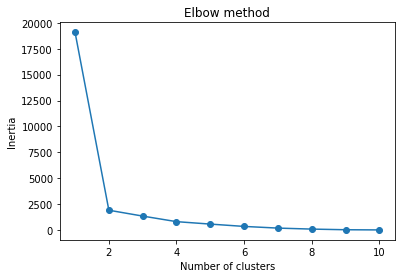

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

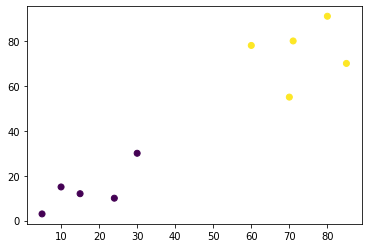

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

## **Hierarchical Clustering**

4a. Single Linkage

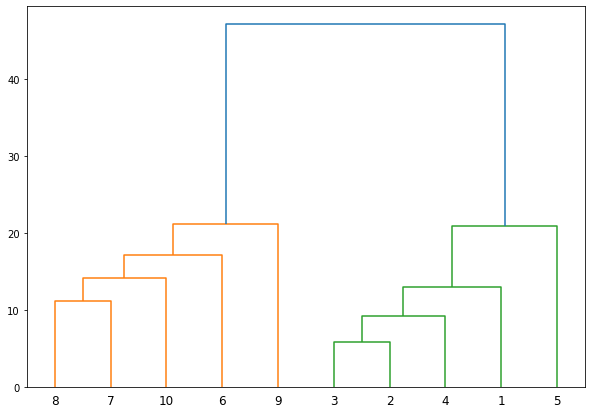

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(data, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Cluster Prediction

[1 1 1 1 1 0 0 0 0 0]


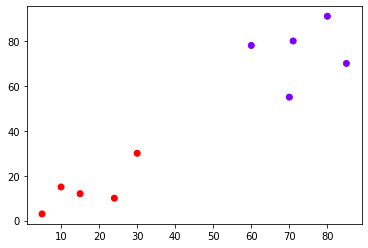

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
print(cluster.labels_)
plt.scatter(x,y, c=cluster.labels_, cmap='rainbow')

4b. Complete Linkage

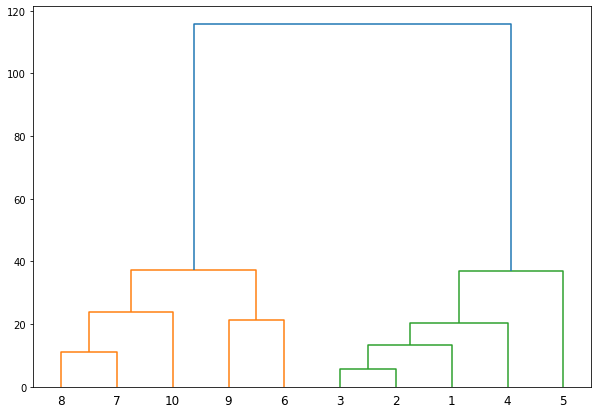

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(data, 'complete')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

[1 1 1 1 1 0 0 0 0 0]


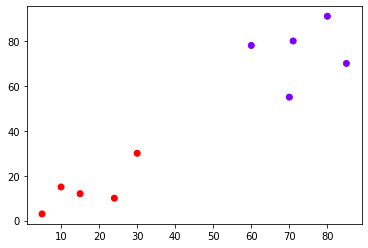

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
print(cluster.labels_)
plt.scatter(x,y, c=cluster.labels_, cmap='rainbow')

4c.  Average Linkage

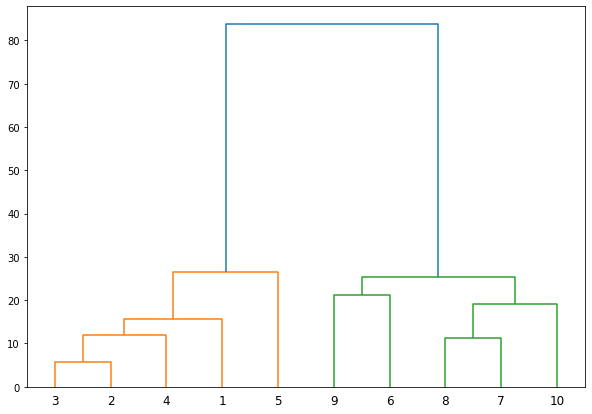

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(data, 'average')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

[1 1 1 1 1 0 0 0 0 0]


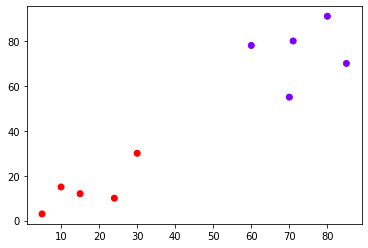

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
print(cluster.labels_)
plt.scatter(x,y, c=cluster.labels_, cmap='rainbow')

5 K-Means on Shopping Dataset

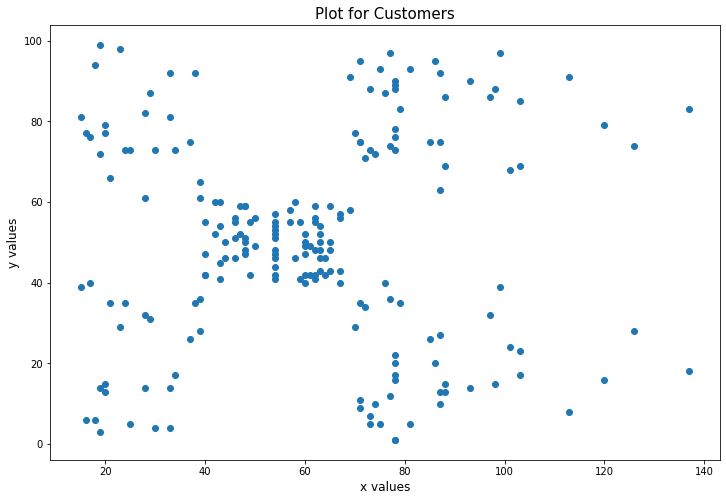

In [ ]:
df=pd.read_csv('shopping dataset.csv')
x=df['Annual Income (k$)']
y=df['Spending Score (1-100)']
data=list(zip(x,y))
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x, y,'o')
plt.xlabel("x values", size=12)
plt.ylabel("y values", size=12)
plt.title("Plot for Customers", size=15)
plt.show()

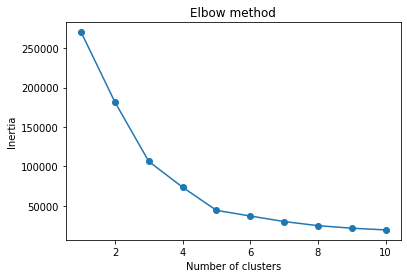

In [ ]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

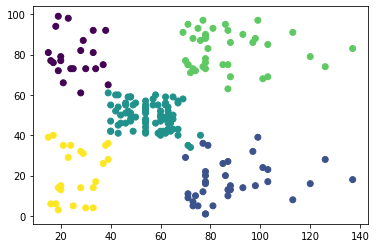

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()